In [ ]:
## -- Packages  -- ##

# General
import pandas as pd
import numpy as np
import os

# Time formatting
import datetime

# Load and save data
import pickle

# Plotting
from matplotlib import pyplot as plt

# Stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL  # requires statsmodels version 11

In [ ]:
## Can not install via anaconda interface so use pip install
#!pip install statsmodels --upgrade

## check version of statsmodels. Should be '0.11.0'
import statsmodels
statsmodels.__version__

'0.11.1'

In [ ]:
## load data
df = pd.read_csv("/Users/conorcavanaugh/Data/Speciale/EMS_dispatch/EMS_incident_Dispatch_Data.csv")

/Users/conorcavanaugh/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,11,17,21,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(16556163, 31)

In [ ]:
## Check the columns names
df.dtypes

CAD_INCIDENT_ID                     int64
INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ACTIVATION_DATETIME          object
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
FIRST_TO_HOSP_DATETIME             object
FIRST_HOSP_ARRIVAL_DATETIME        object
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                            object
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               

In [ ]:
## Choose features to be included and and convert dates to datetime
features = ['INCIDENT_DATETIME','FIRST_ASSIGNMENT_DATETIME','FIRST_TO_HOSP_DATETIME','INCIDENT_DISPOSITION_CODE','BOROUGH', ]
df = df.loc[:,features]

df['INCIDENT_DATETIME'] =  pd.to_datetime(df['INCIDENT_DATETIME'])
df['FIRST_ASSIGNMENT_DATETIME'] = pd.to_datetime(df['FIRST_ASSIGNMENT_DATETIME'])
df['FIRST_TO_HOSP_DATETIME'] =  pd.to_datetime(df['FIRST_TO_HOSP_DATETIME'])

In [ ]:
df.head()

,INCIDENT_DATETIME,FIRST_ASSIGNMENT_DATETIME,FIRST_TO_HOSP_DATETIME,INCIDENT_DISPOSITION_CODE,BOROUGH
0,2008-01-01 00:00:01,NaT,NaT,NaN,BROOKLYN
1,2008-01-01 00:00:05,NaT,NaT,NaN,BROOKLYN
2,2008-01-01 00:00:06,2008-01-01 00:12:18,2008-01-01 00:48:12,82.0,QUEENS
3,2008-01-01 00:00:07,NaT,NaT,NaN,BROOKLYN
4,2008-01-01 00:00:09,NaT,NaT,NaN,BROOKLYN


In [ ]:
## Create borough dataset with bronx
df_bronx = df.loc[df.loc[:,'BOROUGH'] == 'BRONX',:].copy()

In [ ]:
## Create individual data frames for each of 3 possible time series

## 1. Make time series of the amount of calls to the EMS 
df_calls_bronx = df_bronx.loc[:,'INCIDENT_DATETIME']
## 2. Make time series of the amount of EMS vehicles dispatched to an incident
df_dispatched_bronx = df_bronx.loc[:,'FIRST_ASSIGNMENT_DATETIME']
## 3. Make time series of the amount of EMS vehicles taking a patient to the emergency department
df_hospital_arrivals = df.loc[:,'FIRST_TO_HOSP_DATETIME']

In [ ]:
## Remove all rows that contain nans in the respective dataframes
df_calls.dropna(inplace = True)
df_dispatched_bronx.dropna(inplace = True)
df_hospital_arrivals.dropna(inplace = True)

In [ ]:
print(df_calls.shape, df_dispatched.shape, df_hospital_arrivals.shape)

(3827541,) (16426947,) (11708946,)


## Hospital arrivals

In [ ]:
## Create timeseries of taxi demand without features
index = pd.DatetimeIndex(df_hospital_arrivals)
series = pd.Series(0, index=index)

In [ ]:
## remove all dates not in the last 5 years, ie. 2015 - 2019
series = series["2015" : "2019"]

## Split into daily intervals by count
frequency = 'D'
emergency_arrival_daily = series.resample(rule = frequency).count()

In [ ]:
## remove all dates not in 2019
series = series["2019"]

## Split into daily intervals by count
frequency = 'H'
emergency_arrival_hourly = series.resample(rule = frequency).count()

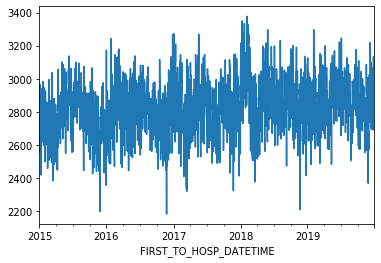

In [ ]:
emergency_arrival_daily.plot()

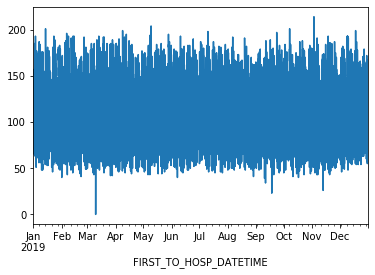

In [ ]:
emergency_arrival_hourly.plot()

In [ ]:
emergency_arrival_hourly["2019-03-10 02:00:00"] = emergency_arrival_hourly["2019-03-03 02:00:00"]

In [ ]:
##Save preproccesed time series to be used in other notebooks
#outfile = open('emergency_series_' + frequency,'wb')
#pickle.dump(emergency_ts,outfile)
#outfile.close()

## Save preprocessed time series as csv file to be used in R 
#emergency_ts.to_csv("emergency_series_hourly.csv", header = True) 

## EMS demand (calls)

In [ ]:
## Create timeseries of taxi demand without features
index = pd.DatetimeIndex(df_calls_bronx)
series = pd.Series(0, index=index)

In [ ]:
## remove all dates not in the last 5 years, ie. 2015 - 2019
series = series["2015" : "2019"]

## Split into daily intervals by count
frequency = 'D'
emergency_calls_daily = series.resample(rule = frequency).count()

In [ ]:
## remove all dates not in 2019
series = series["2019"]

## Split into daily intervals by count
frequency = 'H'
emergency_calls_hourly = series.resample(rule = frequency).count()

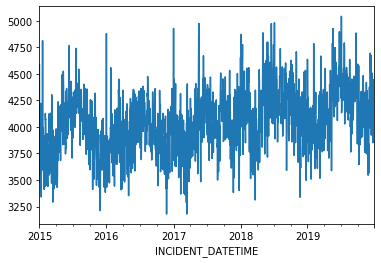

In [ ]:
emergency_calls_daily.plot()

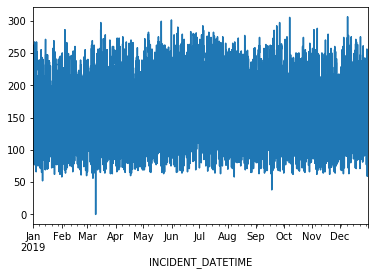

In [ ]:
emergency_calls_hourly.plot()

In [ ]:
emergency_calls_hourly["2019-03-10 02:00:00"] = emergency_calls_hourly["2019-03-03 02:00:00"]

In [ ]:
##Save preproccesed time series to be used in other notebooks
outfile = open('emergency_calls_' + 'H','wb')
pickle.dump(emergency_calls_hourly,outfile)
outfile.close()

## Save preprocessed time series as csv file to be used in R 
emergency_calls_hourly.to_csv("emergency_calls_bronx_hourly.csv", header = True) 

In [ ]:
emergency_calls_hourly

INCIDENT_DATETIME
2019-01-01 00:00:00    43
2019-01-01 01:00:00    47
2019-01-01 02:00:00    47
2019-01-01 03:00:00    50
2019-01-01 04:00:00    53
                       ..
2019-12-31 19:00:00    45
2019-12-31 20:00:00    59
2019-12-31 21:00:00    54
2019-12-31 22:00:00    51
2019-12-31 23:00:00    45
Freq: H, Length: 8760, dtype: int64

## EMS dispatches

In [ ]:
## Create timeseries of taxi demand without features
index = pd.DatetimeIndex(df_dispatched_bronx)
series = pd.Series(0, index=index)

In [ ]:
## remove all dates not in the last 5 years, ie. 2015 - 2019
series = series["2015" : "2019"]

## Split into daily intervals by count
frequency = 'D'
emergency_dispatches_daily = series.resample(rule = frequency).count()

In [ ]:
## remove all dates not in 2019
series = series["2019"]

## Split into daily intervals by count
frequency = 'H'
emergency_dispatches_hourly = series.resample(rule = frequency).count()

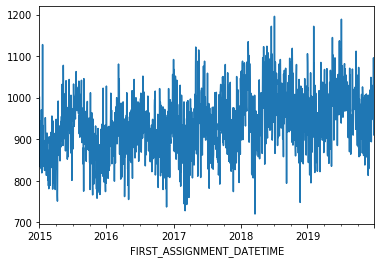

In [ ]:
emergency_dispatches_daily.plot()

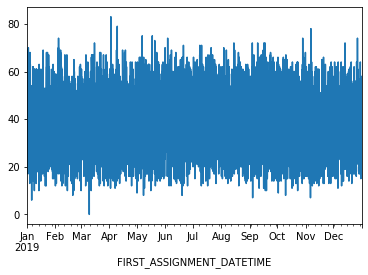

In [ ]:
emergency_dispatches_hourly.plot()

In [ ]:
emergency_dispatches_hourly["2019-03-10 02:00:00"] = emergency_dispatches_hourly["2019-03-03 02:00:00"]

In [ ]:
## export
##Save preproccesed time series to be used in other notebooks
#outfile = open('emergency_dispatches_bronx_' + 'H','wb')
#pickle.dump(emergency_dispatches_hourly,outfile)
#outfile.close()

## Save preprocessed time series as csv file to be used in R 
#emergency_dispatches_hourly.to_csv("emergency_dispatches_bronx_hourly.csv", header = True) 

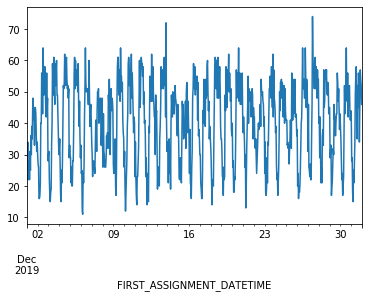

In [ ]:
emergency_dispatches_hourly["2019-12"].plot()

In [ ]:
emergency_dispatches_hourly.tail()

FIRST_ASSIGNMENT_DATETIME
2019-12-31 19:00:00    45
2019-12-31 20:00:00    57
2019-12-31 21:00:00    54
2019-12-31 22:00:00    52
2019-12-31 23:00:00    46
Freq: H, dtype: int64

In [ ]:
df.tail()

,INCIDENT_DATETIME,FIRST_ASSIGNMENT_DATETIME,FIRST_TO_HOSP_DATETIME,INCIDENT_DISPOSITION_CODE,BOROUGH
16556158,2020-02-05 23:08:16,2020-02-05 23:08:54,NaT,90.0,MANHATTAN
16556159,2020-02-05 23:09:09,2020-02-05 23:09:20,2020-02-05 23:38:56,82.0,MANHATTAN
16556160,2020-02-05 23:09:20,2020-02-05 23:09:58,2020-02-05 23:38:50,82.0,BROOKLYN
16556161,2020-02-05 23:09:22,2020-02-05 23:09:31,2020-02-05 23:21:03,82.0,BRONX
16556162,2020-02-05 23:09:53,2020-02-05 23:10:02,2020-02-05 23:44:34,82.0,MANHATTAN
